## Matt Marroquin
Homework 9

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np


#dataset
file = pd.read_csv("hwk09.csv")
df = pd.DataFrame(file)

#get min and max values of the dataset 
max_x = df['x'].max()
min_x = df['x'].min()
max_y = df['y'].max()
min_y = df['y'].min()

## Problem 2 (a)

In [20]:
#this function calculates k-means and plots the result
#parameters:
#col(n) = column used
#mx(n) = max value of column
#mn(n) = min value of column
#numclusters = k number of clusters
#note: max number of clusters available with this implemenation is 8, add more to 'colmap' for more than 8

def plotkmeans(col1, col2, mx1, mx2, mn1, mn2, numclusters):
    #get the largest value and smallest value of the two columns used
    maximum = max(mx1, mx2)
    minimum = min(mn1, mn2)
    
    #centroids
    centroids = {
        i+1: [np.random.randint(minimum, maximum), np.random.randint(minimum, maximum)]
        for i in range(numclusters)
    }

    #centroid code
    kmeans = KMeans(n_clusters=numclusters)
    kmeans.fit(df[[col1, col2]])

    labels = kmeans.predict(df[[col1, col2]])
    centroids = kmeans.cluster_centers_

    #plotting code
    fig = plt.figure(figsize=(8, 8))
    colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: 'w'}

    colors = list(map(lambda x: colmap[x+1], labels))

    plt.scatter(df[col1], df[col2], color=colors, alpha=0.5, edgecolor='k')
    for idx, centroid in enumerate(centroids):
        plt.scatter(*centroid, color=colmap[idx+1])
    plt.xlim(mn1-1, mx1+1)
    plt.ylim(mn1-1, mx2+1)
    plt.title("K-means")
    plt.show()

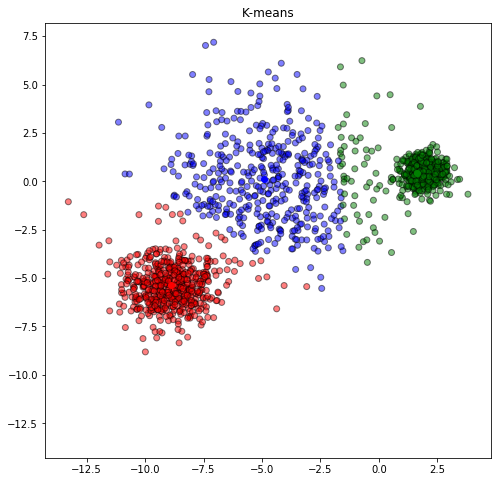

In [21]:
plotkmeans('x', 'y', max_x, max_y, min_x, min_y, 3)

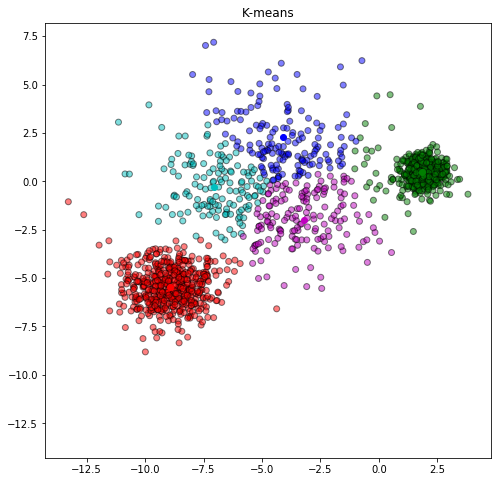

In [22]:
plotkmeans('x', 'y', max_x, max_y, min_x, min_y, 5)

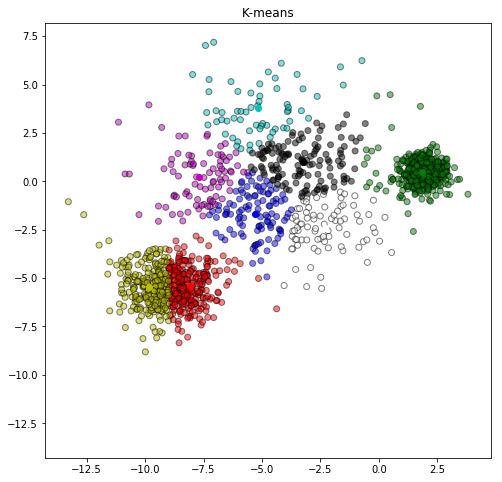

In [23]:
plotkmeans('x', 'y', max_x, max_y, min_x, min_y, 8)

## Problem 2 (b)

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure


#normalizing and scaling the data
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

#this function plots the result of the sklearn DBSCAN algorithm
#parameters:
#e = epsilon
#ms = min points
def getDBSCANplot(e, ms):
    dbsc = DBSCAN(eps = e, min_samples = ms).fit(df)
    clusters = dbsc.fit_predict(df)

    labels = dbsc.labels_
    core_samples = np.zeros_like(labels, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True

    plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap="plasma")
    plt.title("DBSCAN")
    plt.show()

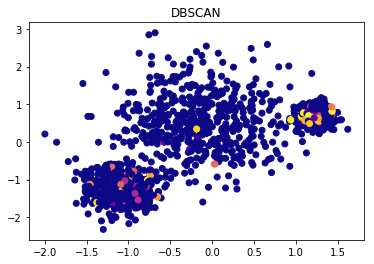

In [25]:
#get DBSCAN object with radius of .01 and minimum of 2 data points
getDBSCANplot(.01, 2)

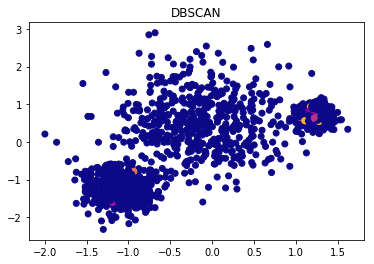

In [26]:
getDBSCANplot(.01, 3)

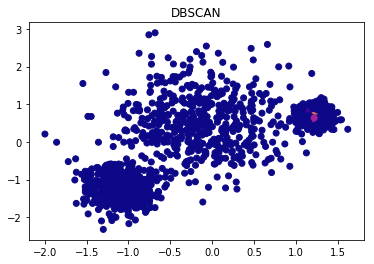

In [27]:
getDBSCANplot(.01, 4)

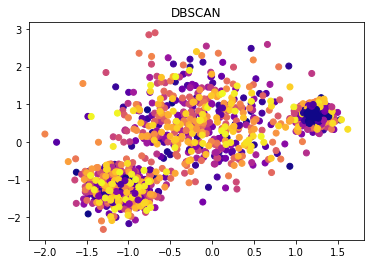

In [28]:
getDBSCANplot(.02, 1)

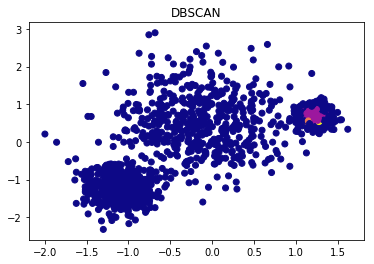

In [29]:
getDBSCANplot(.03, 10)

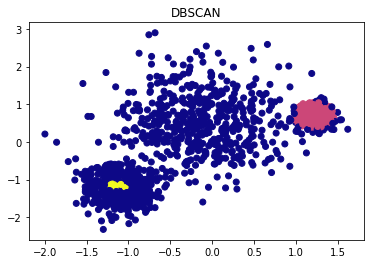

In [30]:
getDBSCANplot(.09, 30)

## Problem 2 (c)

In [31]:
from sklearn.cluster import AgglomerativeClustering

#this function uses sklearn agglomerative clustering to make a plot
#parameters:
#aff = affinity
#link = linkage
def aggClust(aff, link):
    cluster = AgglomerativeClustering(n_clusters=2, affinity=aff, linkage=link)  
    cluster.fit_predict(df)  
    plt.scatter(df[:,0],df[:,1], c=cluster.labels_, cmap='rainbow')  

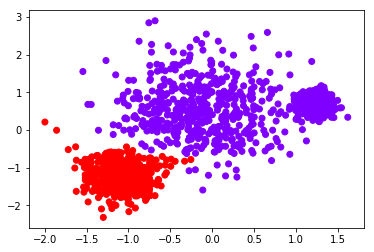

In [32]:
aggClust('euclidean', 'ward')

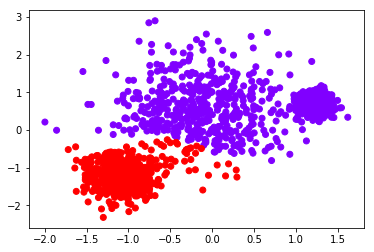

In [33]:
aggClust('euclidean', 'complete')

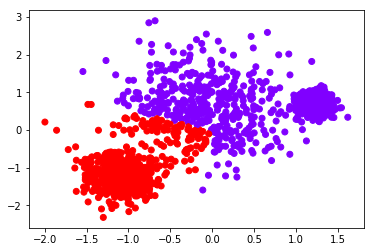

In [34]:
aggClust('cosine', 'complete')

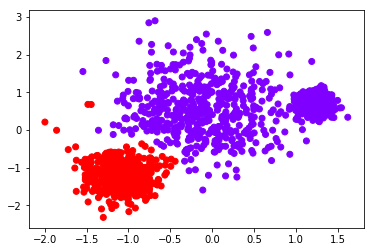

In [35]:
aggClust('l2', 'average')

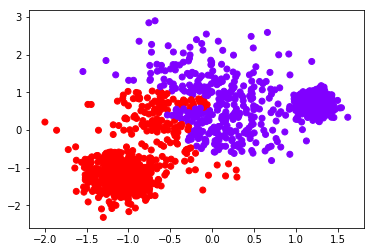

In [36]:
aggClust('manhattan', 'complete')